
Gendered Term Counts by Article

Article ID  Female Term Count  Male Term Count
         1                  9                4
         2                 40               11
         3                  6               21
         4                  2               33
         5                 84               70
         6                  2               10
         7                  7               44
         8                  3               13
         9                 64               10
        10                158               17
        11                 16                4
        12                  8               24
        13                  0               17
        14                 56               26
        15                 12                7
        16                 66               13
        17                  4                3
        18                  0                2
        19                 66               12
        20                

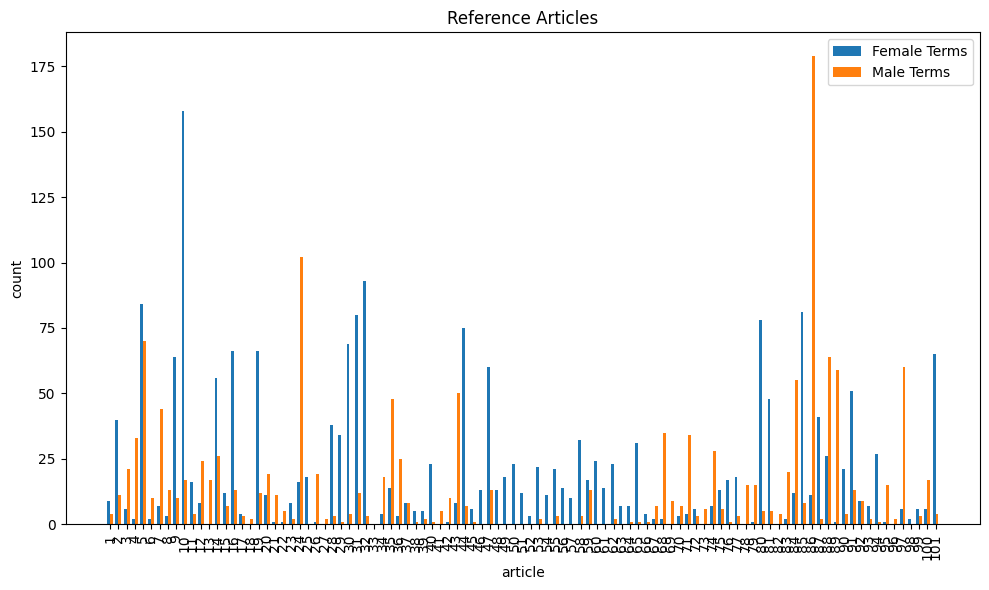

In [38]:
import ast
import re
import matplotlib.pyplot as plt
import pandas as pd

# file_path = 'reference_articles.json'
file_path = 'nyt_ref_articles.json'

female_terms = [
    'she', 'daughter', 'hers', 'her', 'mother', 'woman', 'girl',
    'herself', 'female', 'sister', 'daughters', 'mothers', 'women',
    'girls', 'females', 'sisters', 'aunt', 'aunts', 'niece', 'nieces'
]
male_terms = [
    'he', 'son', 'his', 'him', 'father', 'man', 'boy', 'himself',
    'male', 'brother', 'sons', 'fathers', 'men', 'boys', 'males',
    'brothers', 'uncle', 'uncles', 'nephew', 'nephews'
]

#bc of the triple quotes, can't do json.load, parse it into a python dictionary with literal_eval. thank you chatgpt
with open(file_path, 'r', encoding='utf-8') as f:
    file_content = f.read()
articles = ast.literal_eval(file_content)
if isinstance(articles, list):
    articles = dict(articles)

# regex for matching words, include word boundaries to only get the complete words. thank you google 
female_terms_pattern = re.compile(r'\b(' + '|'.join(female_terms) + r')\b', flags=re.IGNORECASE)
male_terms_pattern = re.compile(r'\b(' + '|'.join(male_terms) + r')\b', flags=re.IGNORECASE)

article_ids = []
female_counts = []
male_counts = []

for article_id, article_text in articles.items():
    f_count = len(female_terms_pattern.findall(article_text))
    m_count = len(male_terms_pattern.findall(article_text))
    
    article_ids.append(article_id)
    female_counts.append(f_count)
    male_counts.append(m_count)

counts_df = pd.DataFrame({
    "Article ID": article_ids,
    "Female Term Count": female_counts,
    "Male Term Count": male_counts
})

print("\nGendered Term Counts by Article\n")
print(counts_df.to_string(index=False))

#plotting time
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(article_ids))
ax.bar(x, female_counts, width=bar_width, label='Female Terms', align='center')
ax.bar([i + bar_width for i in x], male_counts, width=bar_width, label='Male Terms', align='center')
ax.set_xlabel('article')
ax.set_ylabel('count')
ax.set_title('Reference Articles')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(article_ids, rotation=90)
ax.legend()
plt.tight_layout()
plt.show()



 DeepSeek Articles - Gendered Term Counts 
Article ID  Female Term Count  Male Term Count
         1                  1                0
         2                  1                0
         3                  0                0
         4                  1                0
         5                  0                8
         6                  2                0
         7                  0                0
         8                  0                0
         9                 13                2
        10                  1                0
        11                 13                0
        12                  2                1
        13                  0                0
        14                 15                0
        15                  0                0
        16                 14                1
        17                  1                0
        18                  3                3
        19                 21                1
        20      

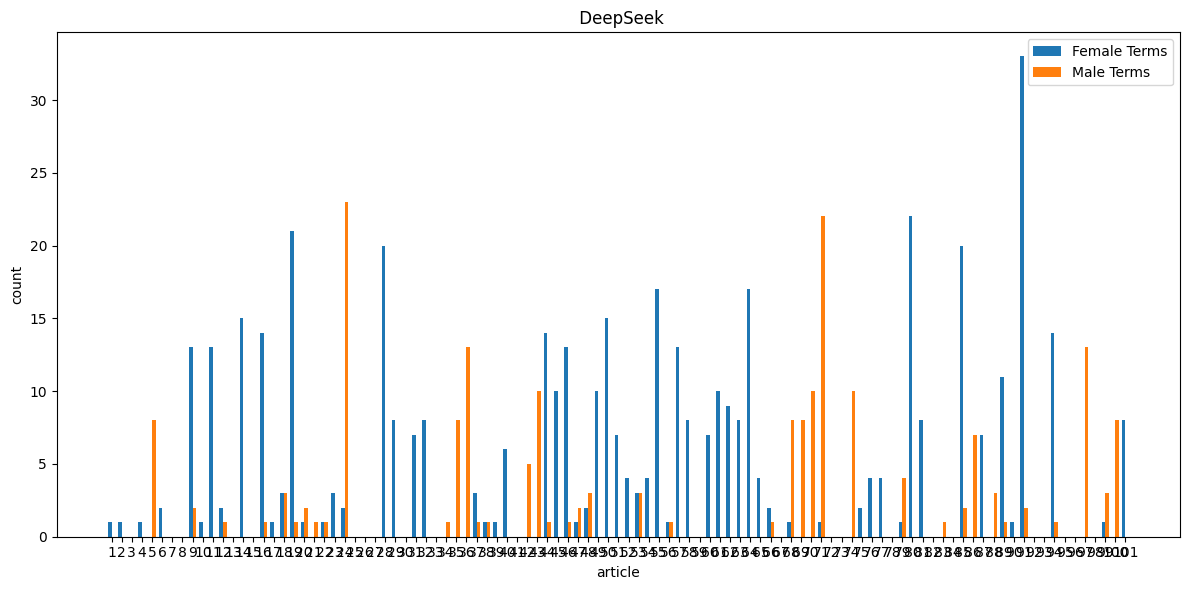


 Claude Articles - Gendered Term Counts 
Article ID  Female Term Count  Male Term Count
         1                  0                0
         2                  0                0
         3                  0                0
         4                  0                0
         5                  1               10
         6                  0                4
         7                  0                4
         8                  0                0
         9                 13                0
        10                  2                0
        11                 11                0
        12                  0                2
        13                  0                0
        14                 17                2
        15                  3                0
        16                  0                0
        17                  1                0
        18                  0                0
        19                 14                1
        20        

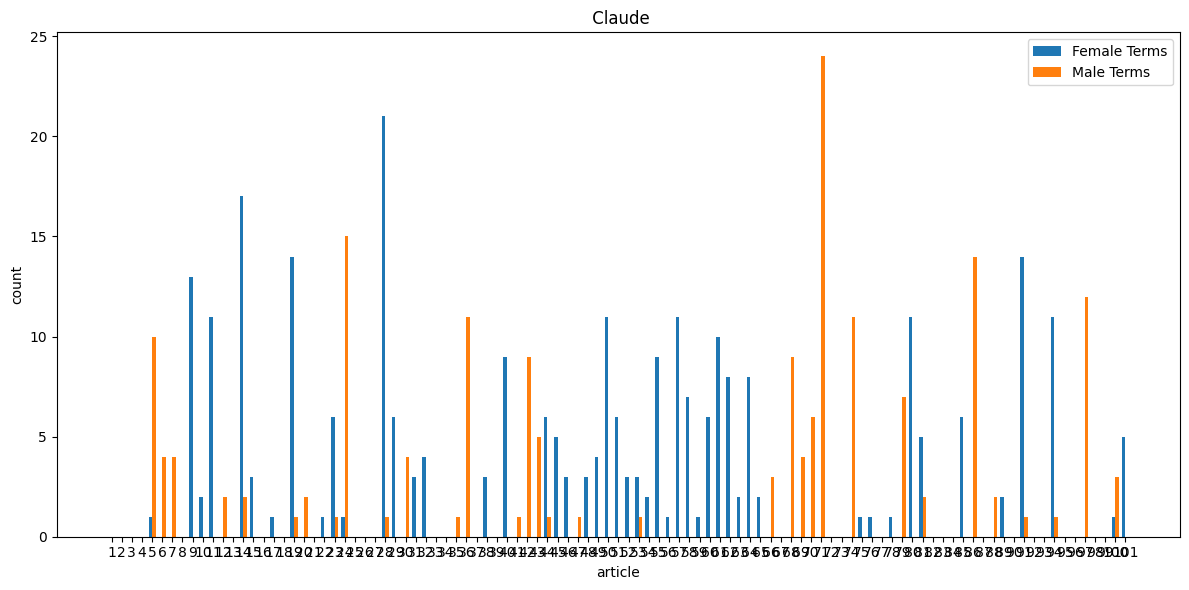


 ChatGPT Articles - Gendered Term Counts 
Article ID  Female Term Count  Male Term Count
         1                  0                0
         2                  0                0
         3                  0                0
         4                  0                0
         5                  2               14
         6                  0                2
         7                  0                1
         8                  0                0
         9                 16                0
        10                  6                1
        11                 14                0
        12                  0                6
        13                  0                0
        14                 17                0
        15                  0                0
        16                  3                0
        17                  1                0
        18                  1                2
        19                 19                0
        20       

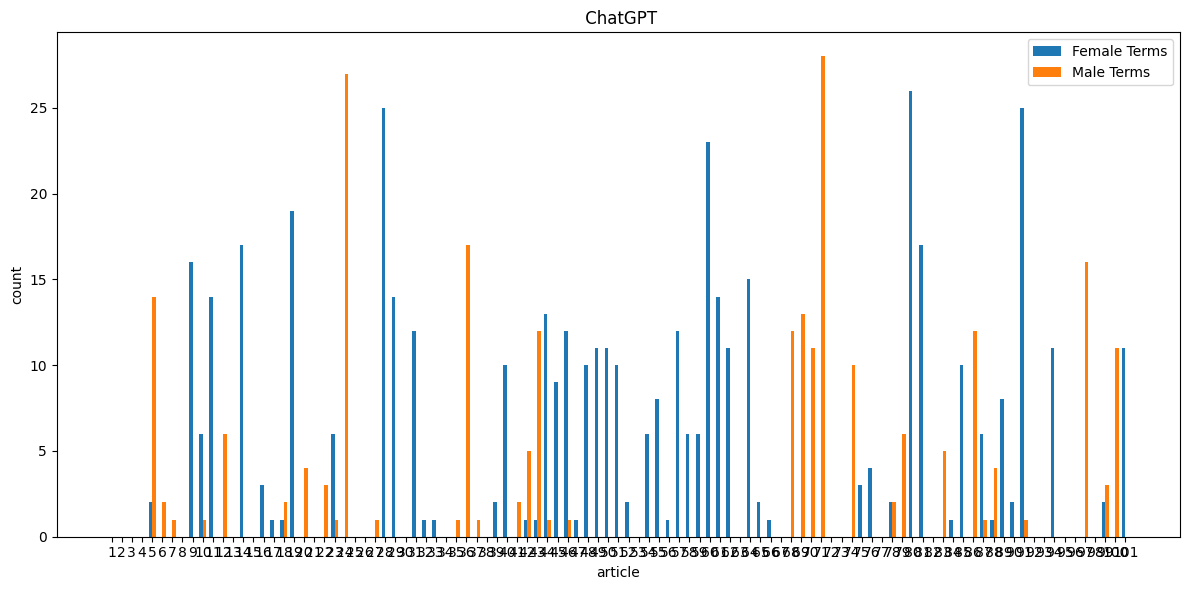

In [20]:
import json
import re
import pandas as pd
import matplotlib.pyplot as plt


# deepseek_path = 'generated_articles/deepseek_articles.json'
# claude_path = 'generated_articles/claude_articles.json'
# chatgpt_path = 'generated_articles/chatgpt_articles.json'
deepseek_path = 'generated_articles/nyt_deepseek.json'
claude_path = 'generated_articles/nyt_claude.json'
chatgpt_path = 'generated_articles/nyt_chatgpt.json'

female_terms = [
    'she', 'daughter', 'hers', 'her', 'mother', 'woman', 'girl',
    'herself', 'female', 'sister', 'daughters', 'mothers', 'women',
    'girls', 'females', 'sisters', 'aunt', 'aunts', 'niece', 'nieces'
]
male_terms = [
    'he', 'son', 'his', 'him', 'father', 'man', 'boy', 'himself',
    'male', 'brother', 'sons', 'fathers', 'men', 'boys', 'males',
    'brothers', 'uncle', 'uncles', 'nephew', 'nephews'
]

def load_articles(path):
    with open(path, 'r', encoding='utf-8') as f:
        return json.load(f)

deepseek_articles = load_articles(deepseek_path)
claude_articles = load_articles(claude_path)
chatgpt_articles = load_articles(chatgpt_path)

#to make sure only whole words are counted
female_terms_pattern = re.compile(r'\b(' + '|'.join(female_terms) + r')\b', flags=re.IGNORECASE)
male_terms_pattern = re.compile(r'\b(' + '|'.join(male_terms) + r')\b', flags=re.IGNORECASE)

def count_gendered_terms_per_article(articles):
    article_ids = []
    female_counts = []
    male_counts = []
    for article_id, text in articles.items():
        f_count = len(female_terms_pattern.findall(text))
        m_count = len(male_terms_pattern.findall(text))
        article_ids.append(article_id)
        female_counts.append(f_count)
        male_counts.append(m_count)
    return pd.DataFrame({
        'Article ID': article_ids,
        'Female Term Count': female_counts,
        'Male Term Count': male_counts
    })

deepseek_df = count_gendered_terms_per_article(deepseek_articles)
claude_df = count_gendered_terms_per_article(claude_articles)
chatgpt_df = count_gendered_terms_per_article(chatgpt_articles)

def plot_gendered_terms(df, model_name):
    fig, ax = plt.subplots(figsize=(12, 6))
    bar_width = 0.35
    x = range(len(df))
    ax.bar(x, df['Female Term Count'], width=bar_width, label='Female Terms', align='center')
    ax.bar([i + bar_width for i in x], df['Male Term Count'], width=bar_width, label='Male Terms', align='center')
    ax.set_xlabel('article')
    ax.set_ylabel('count')
    ax.set_title(f' {model_name}')
    ax.set_xticks([i + bar_width/2 for i in x])
    ax.set_xticklabels(df['Article ID'])
    ax.legend()
    plt.tight_layout()
    plt.show()

print("\n DeepSeek Articles - Gendered Term Counts ")
print(deepseek_df.to_string(index=False))
plot_gendered_terms(deepseek_df, "DeepSeek")

print("\n Claude Articles - Gendered Term Counts ")
print(claude_df.to_string(index=False))
plot_gendered_terms(claude_df, "Claude")

print("\n ChatGPT Articles - Gendered Term Counts ")
print(chatgpt_df.to_string(index=False))
plot_gendered_terms(chatgpt_df, "ChatGPT")


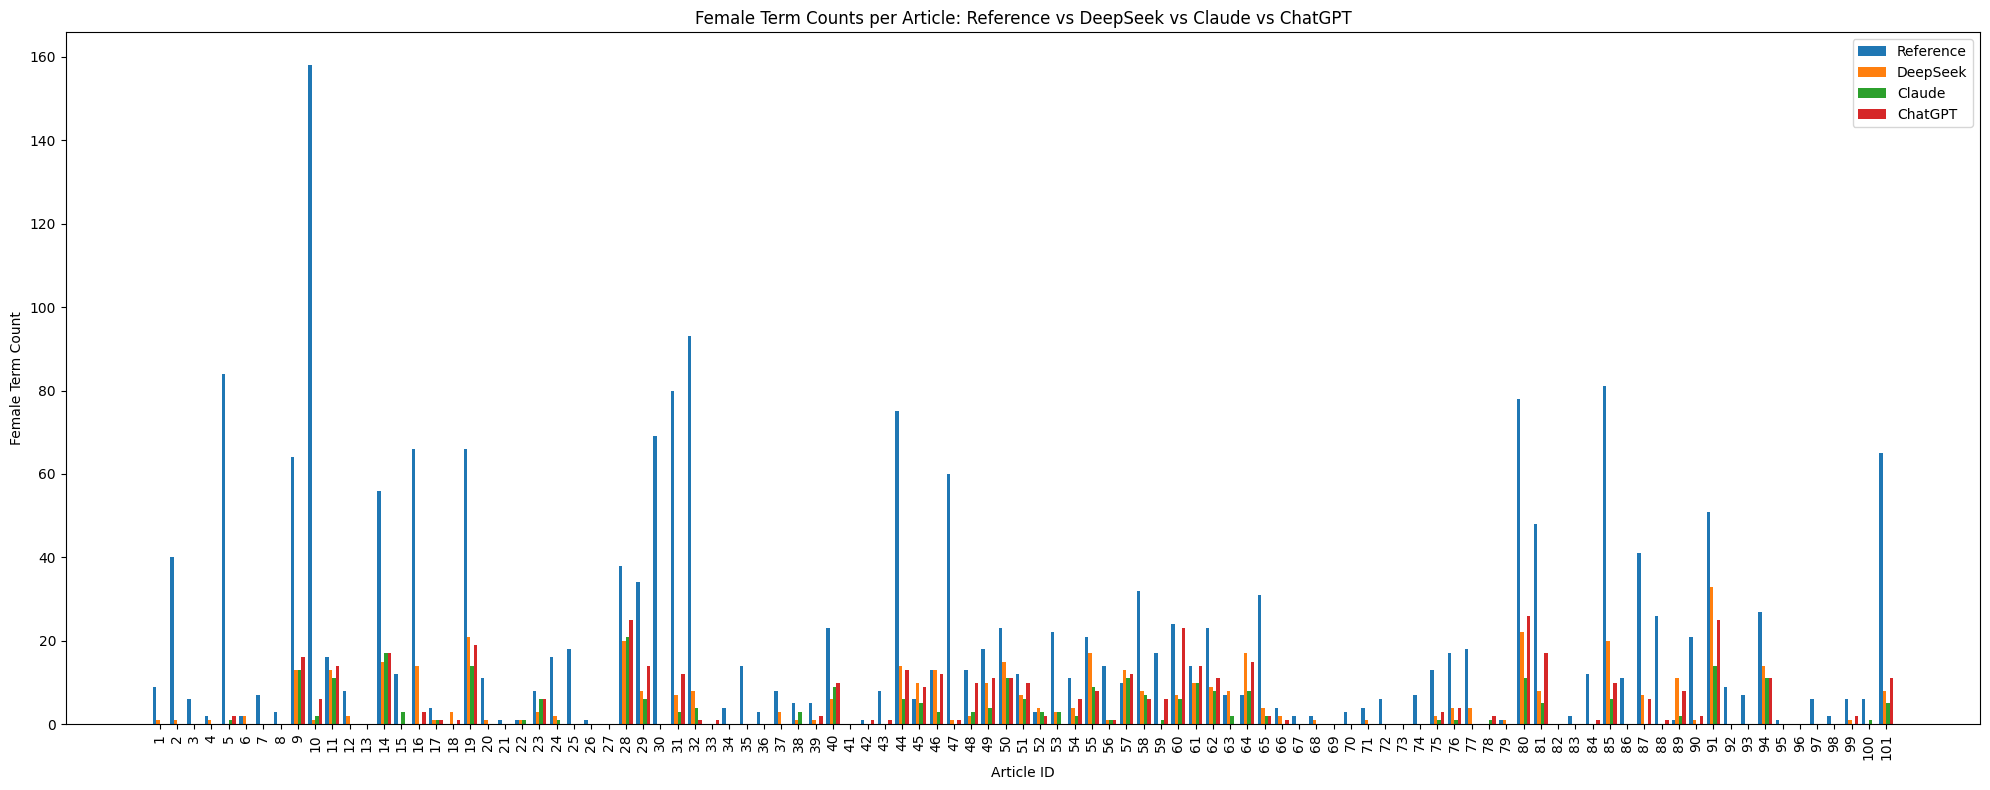

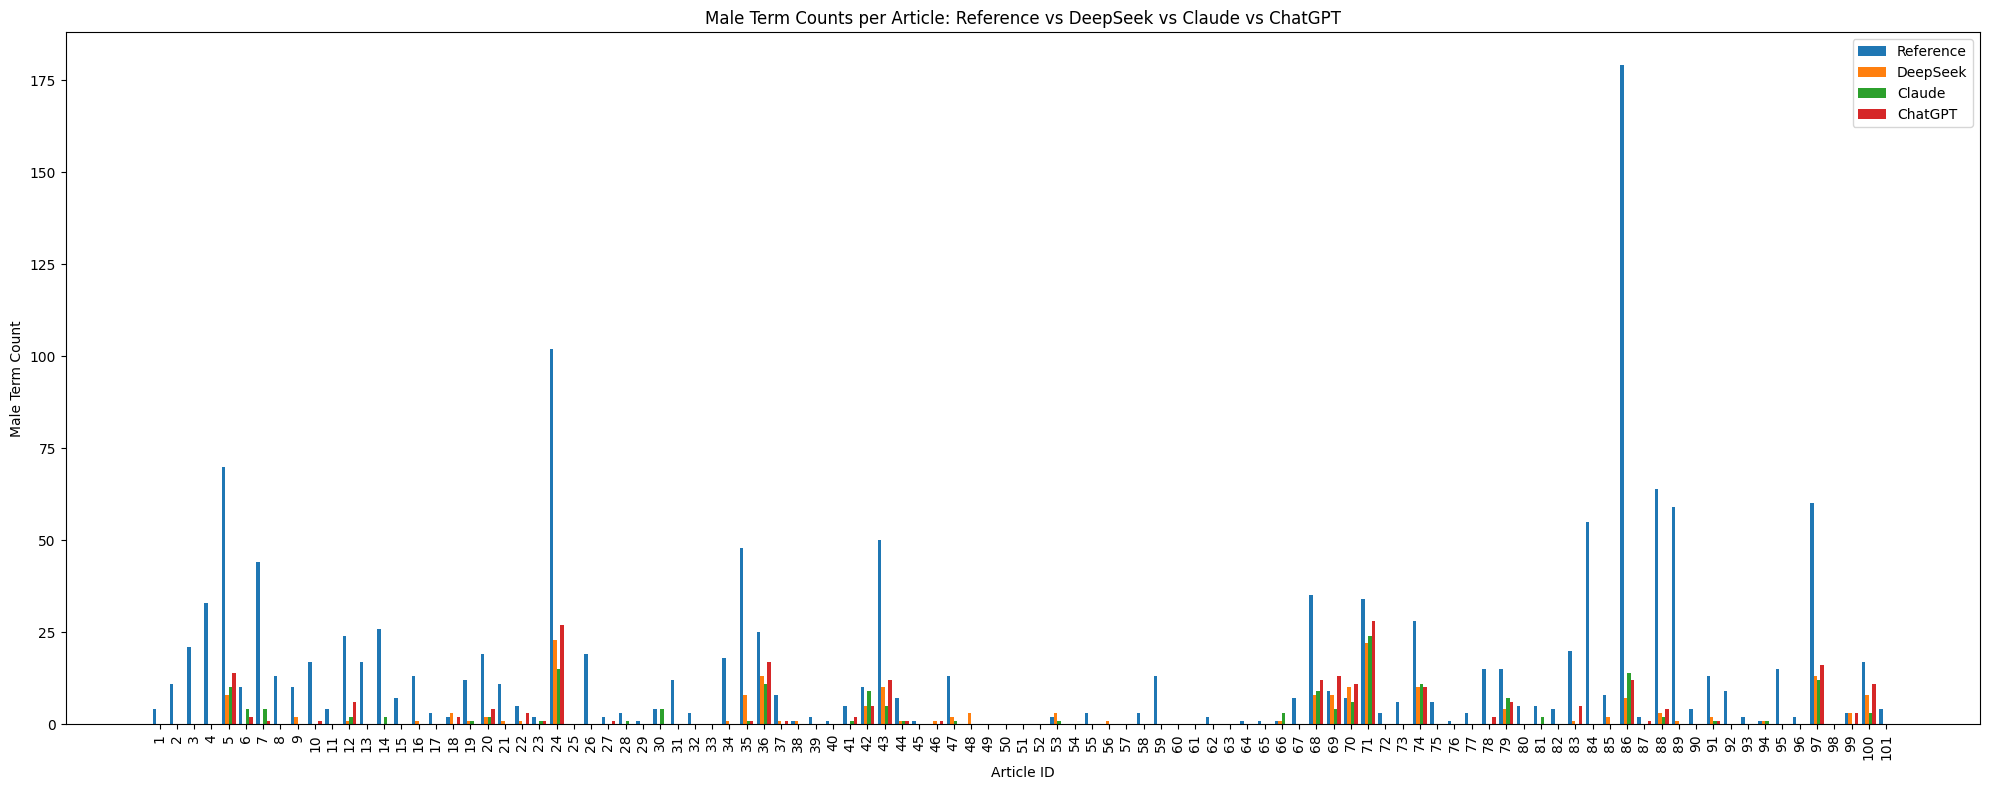

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Merge all data into one DataFrame for comparison

# First, make sure Article IDs are aligned and sorted the same way
reference_df = counts_df.sort_values('Article ID').reset_index(drop=True)
deepseek_df = deepseek_df.sort_values('Article ID').reset_index(drop=True)
claude_df = claude_df.sort_values('Article ID').reset_index(drop=True)
chatgpt_df = chatgpt_df.sort_values('Article ID').reset_index(drop=True)

# 2. Combine into a long format
records = []

for i in range(len(reference_df)):
    article_id = int(reference_df.loc[i, 'Article ID'])  # <- make sure it's treated numerically
    records.append({'Article ID': article_id, 'Model': 'Reference', 'Female Terms': reference_df.loc[i, 'Female Term Count'], 'Male Terms': reference_df.loc[i, 'Male Term Count']})
    records.append({'Article ID': article_id, 'Model': 'DeepSeek',  'Female Terms': deepseek_df.loc[i, 'Female Term Count'],  'Male Terms': deepseek_df.loc[i, 'Male Term Count']})
    records.append({'Article ID': article_id, 'Model': 'Claude',    'Female Terms': claude_df.loc[i, 'Female Term Count'],    'Male Terms': claude_df.loc[i, 'Male Term Count']})
    records.append({'Article ID': article_id, 'Model': 'ChatGPT',    'Female Terms': chatgpt_df.loc[i, 'Female Term Count'],    'Male Terms': chatgpt_df.loc[i, 'Male Term Count']})

full_df = pd.DataFrame(records)

# 3. Sort full_df properly
full_df = full_df.sort_values(['Article ID', 'Model']).reset_index(drop=True)

# Models and article IDs
models = ['Reference', 'DeepSeek', 'Claude', 'ChatGPT']
articles = sorted(full_df['Article ID'].unique())
bar_width = 0.2
group_width = bar_width * len(models)
x = range(len(articles))

# 4. Plot Female Terms only
fig, ax = plt.subplots(figsize=(20, 8))

for i, model in enumerate(models):
    subset = full_df[full_df['Model'] == model]
    ax.bar(
        [xi + i * bar_width for xi in x],
        subset['Female Terms'],
        width=bar_width,
        label=model
    )

ax.set_xlabel('Article ID')
ax.set_ylabel('Female Term Count')
ax.set_title('Female Term Counts per Article: Reference vs DeepSeek vs Claude vs ChatGPT')
ax.set_xticks([xi + group_width/2 - bar_width/2 for xi in x])
ax.set_xticklabels(articles)
ax.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 5. Plot Male Terms only
fig, ax = plt.subplots(figsize=(20, 8))

for i, model in enumerate(models):
    subset = full_df[full_df['Model'] == model]
    ax.bar(
        [xi + i * bar_width for xi in x],
        subset['Male Terms'],
        width=bar_width,
        label=model
    )

ax.set_xlabel('Article ID')
ax.set_ylabel('Male Term Count')
ax.set_title('Male Term Counts per Article: Reference vs DeepSeek vs Claude vs ChatGPT')
ax.set_xticks([xi + group_width/2 - bar_width/2 for xi in x])
ax.set_xticklabels(articles)
ax.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


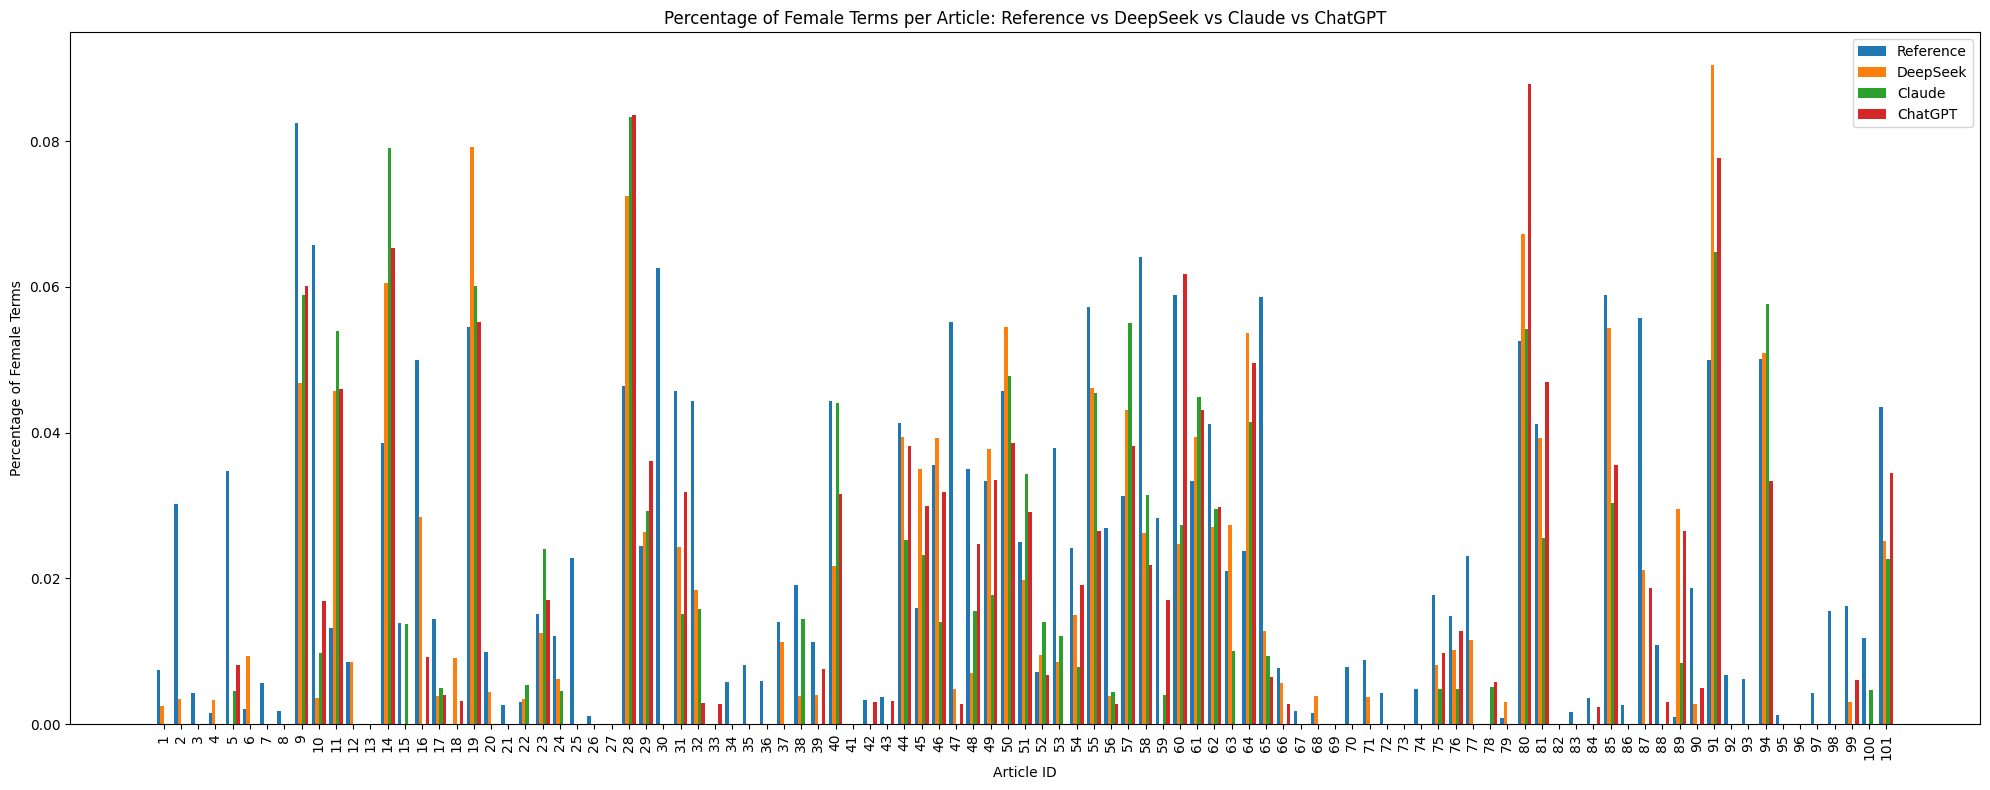

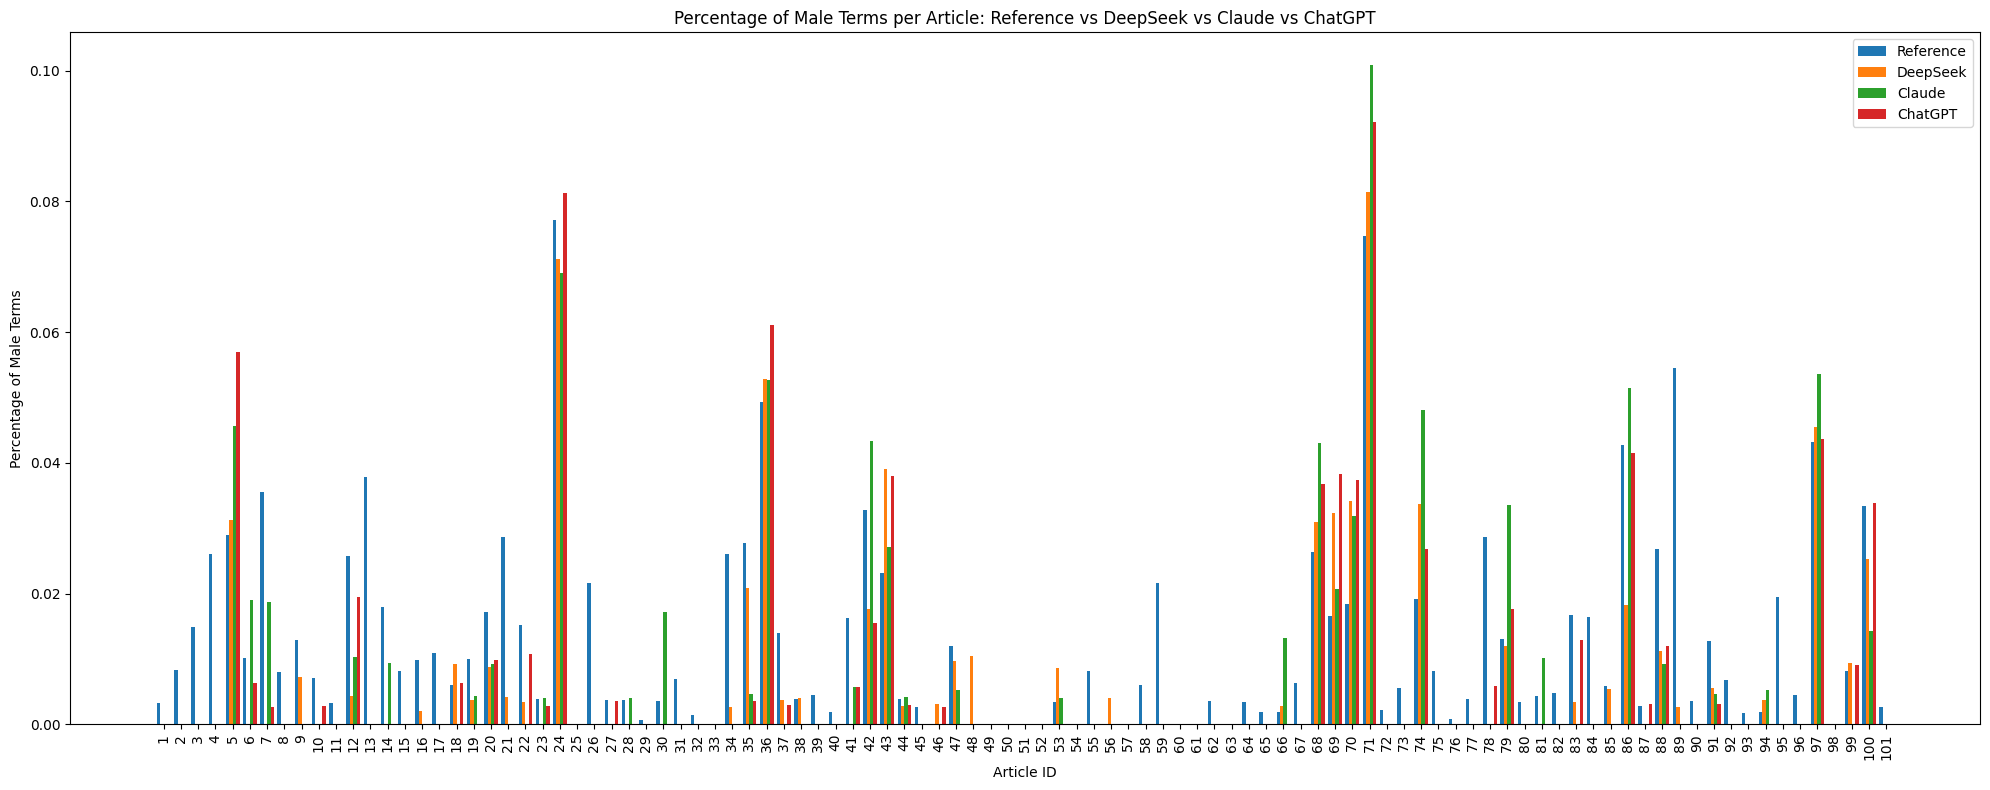

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Ensure DataFrames are sorted and ready
reference_df = ref_df.sort_values('Article ID').reset_index(drop=True)
deepseek_df = deepseek_df.sort_values('Article ID').reset_index(drop=True)
claude_df = claude_df.sort_values('Article ID').reset_index(drop=True)
chatgpt_df = chatgpt_df.sort_values('Article ID').reset_index(drop=True)

# 2. Combine all into long-format DataFrame with percentages
records_pct = []

for i in range(len(reference_df)):
    article_id = int(reference_df.loc[i, 'Article ID'])
    records_pct.extend([
        {'Article ID': article_id, 'Model': 'Reference', 'Female %': reference_df.loc[i, '% Female'], 'Male %': reference_df.loc[i, '% Male']},
        {'Article ID': article_id, 'Model': 'DeepSeek',  'Female %': deepseek_df.loc[i, '% Female'],  'Male %': deepseek_df.loc[i, '% Male']},
        {'Article ID': article_id, 'Model': 'Claude',    'Female %': claude_df.loc[i, '% Female'],    'Male %': claude_df.loc[i, '% Male']},
        {'Article ID': article_id, 'Model': 'ChatGPT',   'Female %': chatgpt_df.loc[i, '% Female'],   'Male %': chatgpt_df.loc[i, '% Male']},
    ])

full_pct_df = pd.DataFrame(records_pct)
full_pct_df = full_pct_df.sort_values(['Article ID', 'Model']).reset_index(drop=True)

# 3. Setup plot parameters
models = ['Reference', 'DeepSeek', 'Claude', 'ChatGPT']
articles = sorted(full_pct_df['Article ID'].unique())
bar_width = 0.2
group_width = bar_width * len(models)
x = range(len(articles))

# 4. Plot % Female Terms
fig, ax = plt.subplots(figsize=(20, 8))
for i, model in enumerate(models):
    subset = full_pct_df[full_pct_df['Model'] == model]
    ax.bar(
        [xi + i * bar_width for xi in x],
        subset['Female %'],
        width=bar_width,
        label=model
    )

ax.set_xlabel('Article ID')
ax.set_ylabel('Percentage of Female Terms')
ax.set_title('Percentage of Female Terms per Article: Reference vs DeepSeek vs Claude vs ChatGPT')
ax.set_xticks([xi + group_width/2 - bar_width/2 for xi in x])
ax.set_xticklabels(articles)
ax.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 5. Plot % Male Terms
fig, ax = plt.subplots(figsize=(20, 8))
for i, model in enumerate(models):
    subset = full_pct_df[full_pct_df['Model'] == model]
    ax.bar(
        [xi + i * bar_width for xi in x],
        subset['Male %'],
        width=bar_width,
        label=model
    )

ax.set_xlabel('Article ID')
ax.set_ylabel('Percentage of Male Terms')
ax.set_title('Percentage of Male Terms per Article: Reference vs DeepSeek vs Claude vs ChatGPT')
ax.set_xticks([xi + group_width/2 - bar_width/2 for xi in x])
ax.set_xticklabels(articles)
ax.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [39]:
print(type(articles))



<class 'dict'>


In [40]:
import re

def add_total_words_and_proportions(df, articles):
    df = df.copy()
    total_words = []
    for aid in df['Article ID']:
        text = articles[aid]  # Cast to string for proper indexing
        words = re.findall(r'\w+', text)
        total_words.append(len(words))
    
    df['Total Words'] = total_words
    df['% Female'] = df['Female Term Count'] / df['Total Words']
    df['% Male'] = df['Male Term Count'] / df['Total Words']
    df['% Female Gendered'] = df['Female Term Count'] / (df['Female Term Count'] + df['Male Term Count'])
    df['% Male Gendered'] = df['Male Term Count'] / (df['Female Term Count'] + df['Male Term Count'])
    return df

ref_df = add_total_words_and_proportions(counts_df, articles)
deepseek_df = add_total_words_and_proportions(deepseek_df, deepseek_articles)
claude_df = add_total_words_and_proportions(claude_df, claude_articles)
chatgpt_df = add_total_words_and_proportions(chatgpt_df, chatgpt_articles)


In [28]:
def compute_wasserstein(ref, llm):
    distances = []
    for i in range(len(ref)):
        f1 = ref.loc[i, 'Female Term Count']
        m1 = ref.loc[i, 'Male Term Count']
        f2 = llm.loc[i, 'Female Term Count']
        m2 = llm.loc[i, 'Male Term Count']
        if (f1 + m1 == 0) or (f2 + m2 == 0):
            distances.append(None)
        else:
            p1 = m1 / (f1 + m1)
            p2 = m2 / (f2 + m2)
            distances.append(abs(p1 - p2))
    return distances

deepseek_wd = compute_wasserstein(ref_df, deepseek_df)
claude_wd = compute_wasserstein(ref_df, claude_df)
chatgpt_wd = compute_wasserstein(ref_df, chatgpt_df)


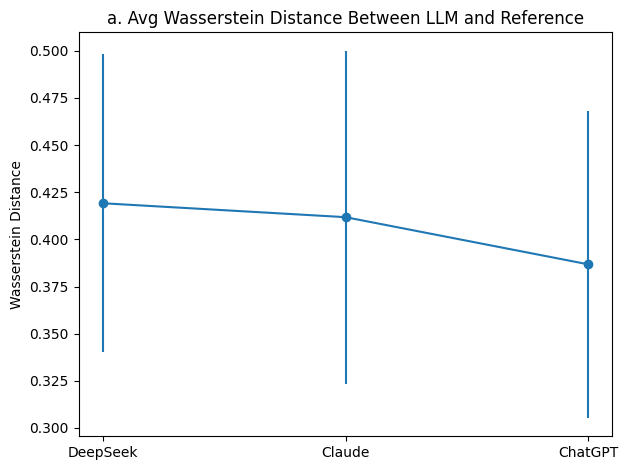

In [29]:
import numpy as np
import seaborn as sns

def mean_ci(data):
    data = [x for x in data if x is not None]
    mean = np.mean(data)
    ci = 1.96 * np.std(data) / np.sqrt(len(data))
    return mean, ci

models = ['DeepSeek', 'Claude', 'ChatGPT']
means, cis = zip(*[mean_ci(x) for x in [deepseek_wd, claude_wd, chatgpt_wd]])

plt.errorbar(models, means, yerr=cis, fmt='-o')
plt.ylabel('Wasserstein Distance')
plt.title('a. Avg Wasserstein Distance Between LLM and Reference')
plt.tight_layout()
plt.show()


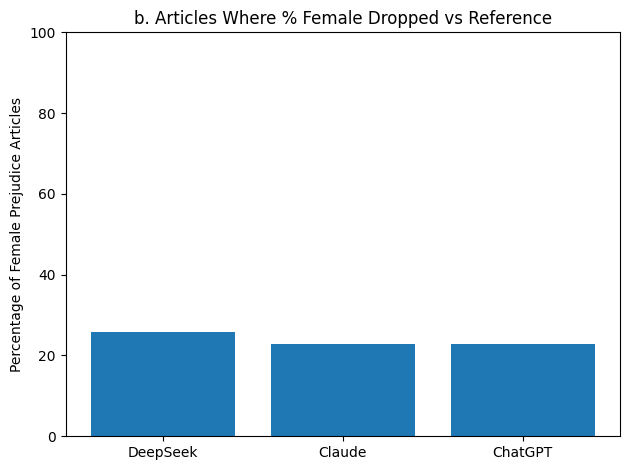

In [30]:
def female_prejudice(ref, llm):
    return np.mean(llm['% Female Gendered'] < ref['% Female Gendered'])

rates = [
    female_prejudice(ref_df, deepseek_df),
    female_prejudice(ref_df, claude_df),
    female_prejudice(ref_df, chatgpt_df)
]

plt.bar(models, [r*100 for r in rates])
plt.ylabel('Percentage of Female Prejudice Articles')
plt.title('b. Articles Where % Female Dropped vs Reference')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


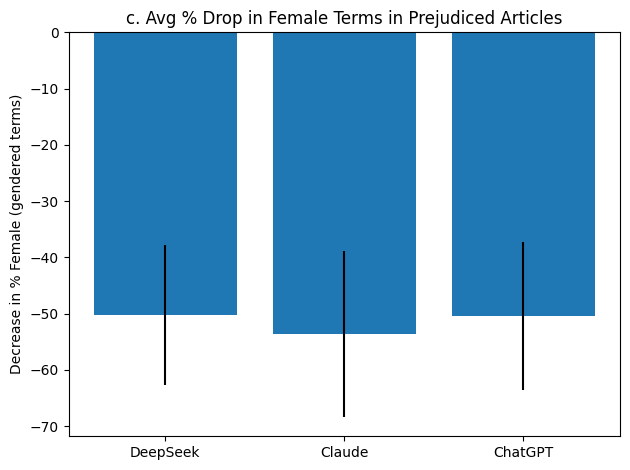

In [31]:
def reduction(ref, llm):
    mask = llm['% Female Gendered'] < ref['% Female Gendered']
    diff = (llm['% Female Gendered'] - ref['% Female Gendered'])[mask]
    return np.mean(diff) * 100, 1.96 * np.std(diff) * 100 / np.sqrt(len(diff))

reductions, ci = zip(*[reduction(ref_df, d) for d in [deepseek_df, claude_df, chatgpt_df]])

plt.bar(models, reductions, yerr=ci)
plt.ylabel('Decrease in % Female (gendered terms)')
plt.title('c. Avg % Drop in Female Terms in Prejudiced Articles')
plt.tight_layout()
plt.show()


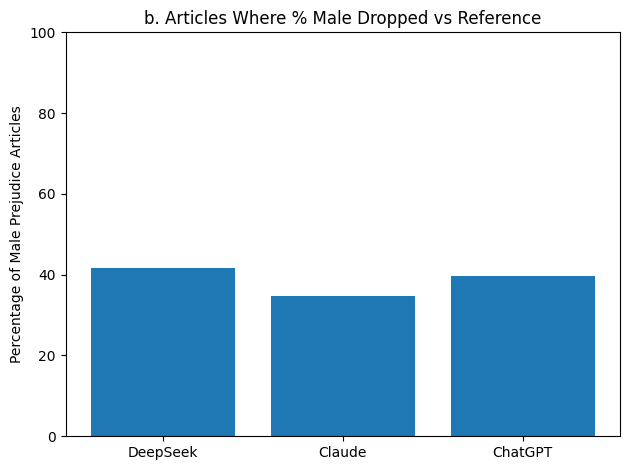

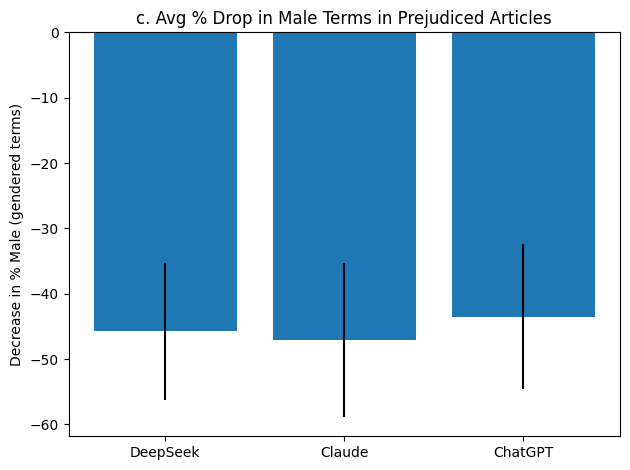

In [32]:
def male_prejudice(ref, llm):
    return np.mean(llm['% Male Gendered'] < ref['% Male Gendered'])

rates = [
    male_prejudice(ref_df, deepseek_df),
    male_prejudice(ref_df, claude_df),
    male_prejudice(ref_df, chatgpt_df)
]

plt.bar(models, [r*100 for r in rates])
plt.ylabel('Percentage of Male Prejudice Articles')
plt.title('b. Articles Where % Male Dropped vs Reference')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

def reduction(ref, llm):
    mask = llm['% Male Gendered'] < ref['% Male Gendered']
    diff = (llm['% Male Gendered'] - ref['% Male Gendered'])[mask]
    return np.mean(diff) * 100, 1.96 * np.std(diff) * 100 / np.sqrt(len(diff))

reductions, ci = zip(*[reduction(ref_df, d) for d in [deepseek_df, claude_df, chatgpt_df]])

plt.bar(models, reductions, yerr=ci)
plt.ylabel('Decrease in % Male (gendered terms)')
plt.title('c. Avg % Drop in Male Terms in Prejudiced Articles')
plt.tight_layout()
plt.show()

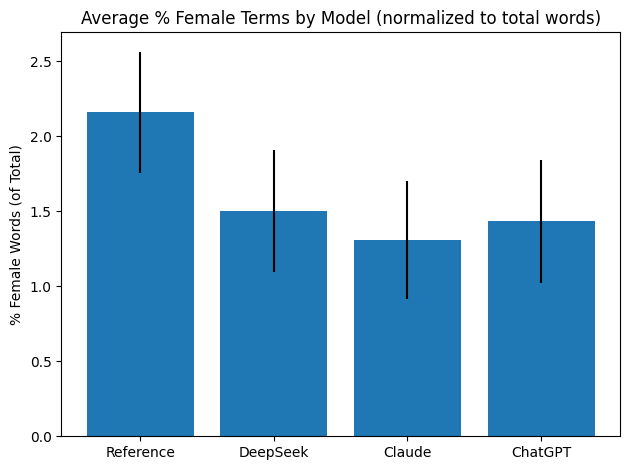

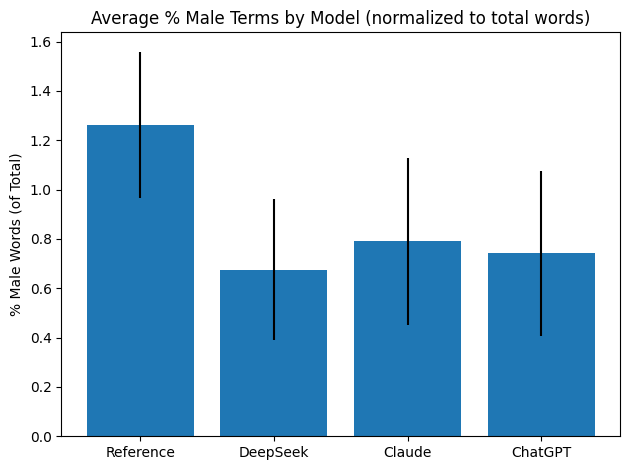

In [33]:
def plot_percent_words(df_list, label):
    models = ['Reference', 'DeepSeek', 'Claude', 'ChatGPT']
    vals = [df[f'% {label}'].mean() * 100 for df in df_list]
    ci = [1.96 * df[f'% {label}'].std() * 100 / np.sqrt(len(df)) for df in df_list]
    
    plt.bar(models, vals, yerr=ci)
    plt.ylabel(f'% {label} Words (of Total)')
    plt.title(f'Average % {label} Terms by Model (normalized to total words)')
    plt.tight_layout()
    plt.show()

plot_percent_words([ref_df, deepseek_df, claude_df, chatgpt_df], "Female")
plot_percent_words([ref_df, deepseek_df, claude_df, chatgpt_df], "Male")


In [34]:
from scipy.stats import ttest_rel
import numpy as np
import pandas as pd

def compute_ttest(ref_vals, llm_vals):
    # Drop rows where either value is missing (e.g., due to 0 total words)
    mask = (ref_vals.notnull()) & (llm_vals.notnull())
    ref = ref_vals[mask]
    llm = llm_vals[mask]
    
    # Paired t-test
    stat, pval = ttest_rel(ref, llm)
    
    # Mean diff and 95% CI
    diffs = llm - ref
    mean_diff = diffs.mean()
    ci = 1.96 * diffs.std() / np.sqrt(len(diffs))
    
    return mean_diff * 100, ci * 100, pval

# Store results in a list of rows
results = []

for label, llm_df in [('DeepSeek', deepseek_df), ('Claude', claude_df), ('ChatGPT', chatgpt_df)]:
    f_mean, f_ci, f_p = compute_ttest(ref_df['% Female'], llm_df['% Female'])
    m_mean, m_ci, m_p = compute_ttest(ref_df['% Male'], llm_df['% Male'])
    
    results.append({
        'Model': label,
        'Δ % Female (mean ± CI)': f"{f_mean:.2f}% ± {f_ci:.2f}%",
        'p (female)': f"{f_p:.4f}",
        'Δ % Male (mean ± CI)': f"{m_mean:.2f}% ± {m_ci:.2f}%",
        'p (male)': f"{m_p:.4f}"
    })

# Convert to DataFrame for pretty printing
ttest_df = pd.DataFrame(results)

# Display as Markdown table
from IPython.display import display, Markdown

md_table = "| Model | Δ % Female (mean ± CI) | p (female) | Δ % Male (mean ± CI) | p (male) |\n"
md_table += "|--------|-------------------------|-------------|------------------------|-----------|\n"
for row in results:
    md_table += f"| {row['Model']} | {row['Δ % Female (mean ± CI)']} | {row['p (female)']} | {row['Δ % Male (mean ± CI)']} | {row['p (male)']} |\n"

display(Markdown(md_table))


| Model | Δ % Female (mean ± CI) | p (female) | Δ % Male (mean ± CI) | p (male) |
|--------|-------------------------|-------------|------------------------|-----------|
| DeepSeek | -0.66% ± 0.58% | 0.0278 | -0.59% ± 0.37% | 0.0025 |
| Claude | -0.85% ± 0.55% | 0.0032 | -0.47% ± 0.41% | 0.0260 |
| ChatGPT | -0.73% ± 0.58% | 0.0161 | -0.52% ± 0.40% | 0.0129 |


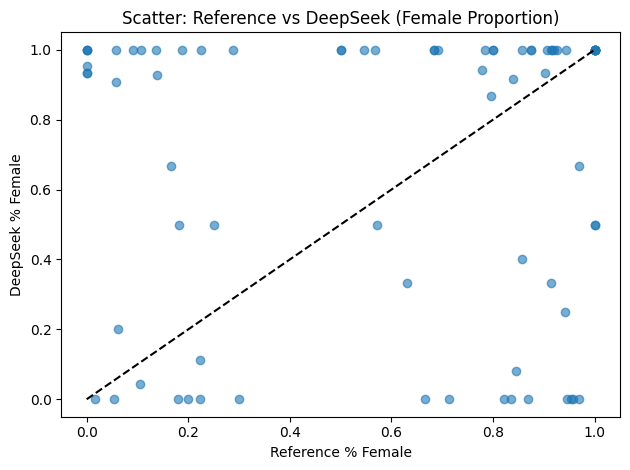

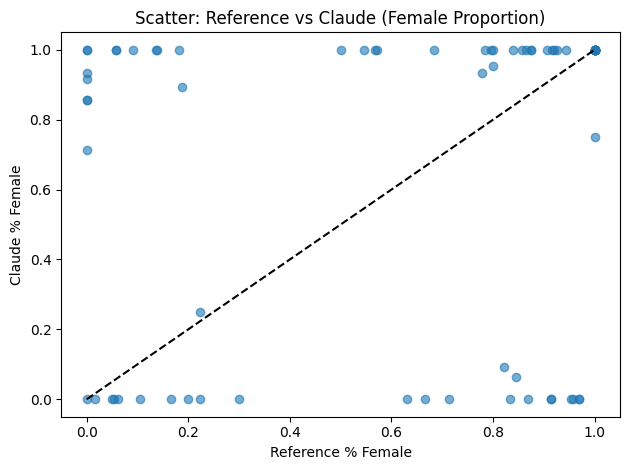

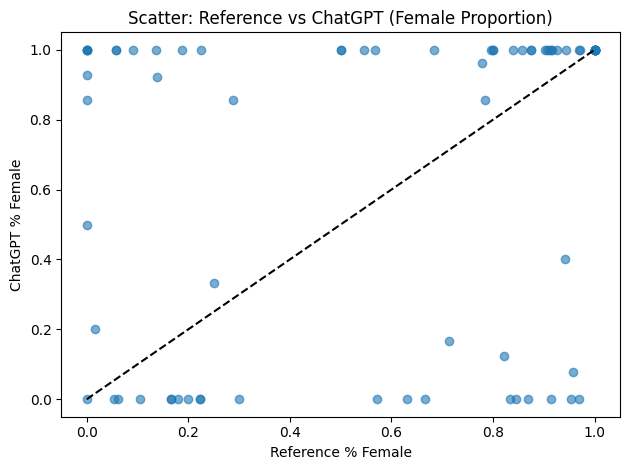

In [35]:
def scatter_plot(ref, llm, model_name):
    plt.scatter(ref['% Female Gendered'], llm['% Female Gendered'], alpha=0.6)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Reference % Female')
    plt.ylabel(f'{model_name} % Female')
    plt.title(f'Scatter: Reference vs {model_name} (Female Proportion)')
    plt.tight_layout()
    plt.show()

scatter_plot(ref_df, deepseek_df, "DeepSeek")
scatter_plot(ref_df, claude_df, "Claude")
scatter_plot(ref_df, chatgpt_df, "ChatGPT")


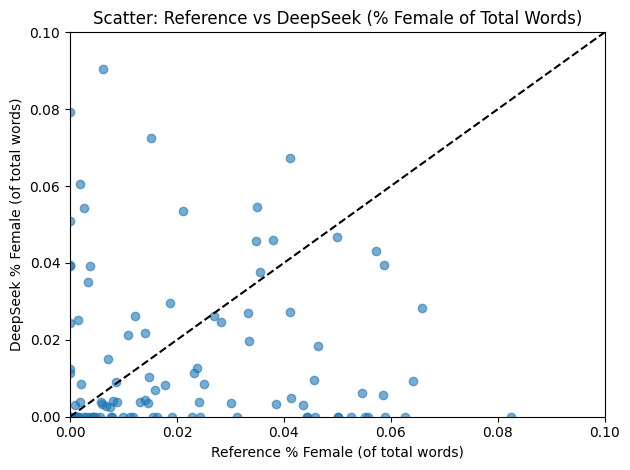

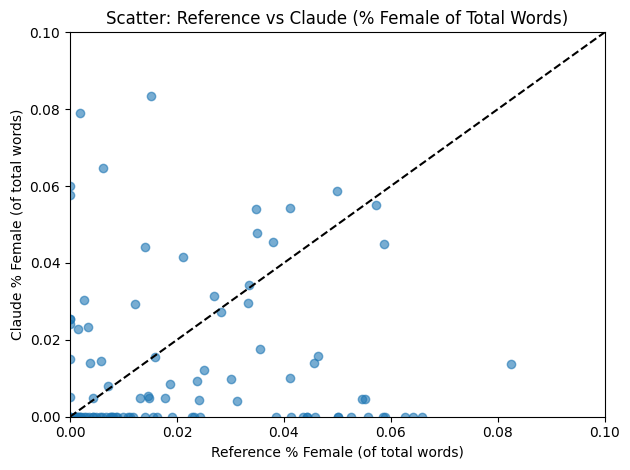

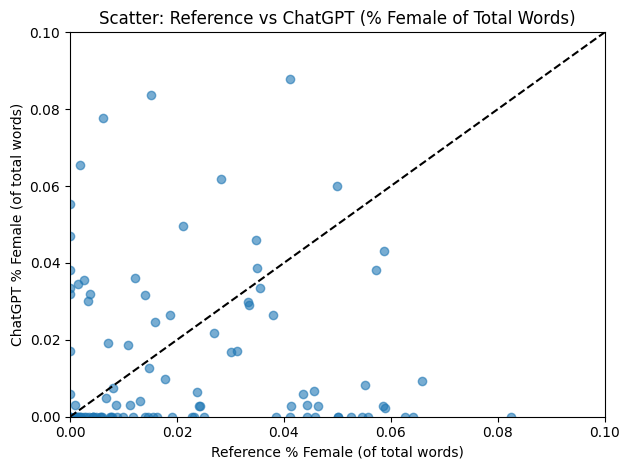

In [36]:
def scatter_plot_total_percent(ref, llm, model_name, xlim=(0, 0.1), ylim=(0, 0.1)):
    plt.scatter(ref['% Female'], llm['% Female'], alpha=0.6)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Reference % Female (of total words)')
    plt.ylabel(f'{model_name} % Female (of total words)')
    plt.title(f'Scatter: Reference vs {model_name} (% Female of Total Words)')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.tight_layout()
    plt.show()
scatter_plot_total_percent(ref_df, deepseek_df, "DeepSeek")
scatter_plot_total_percent(ref_df, claude_df, "Claude")
scatter_plot_total_percent(ref_df, chatgpt_df, "ChatGPT")
